In [13]:
# -*- coding: UTF-8 -*-

### 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

### 同時於每次下的網頁更新後，立即爬取網頁內容，並解析萃取新聞網址與標題:

In [14]:
import requests
import re
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [19]:
# 爬取網頁內容，解析後萃取新聞網址與標題:
def getNewReleaseTime(bsObj):
    spans = bsObj.find_all('span')
    #for t in spans:
    #    print(t.string)
    text = spans[0].string
    #print(text)
    return text

def getNewsCategory(bsObj):
    # sc-gacfCG bPSpUf
    tags = bsObj.find_all('div',attrs={"class": "sc-gacfCG bPSpUf"})
    #for element in tags:
    #    print(element)
    text = tags[0].string
    #print(text)
    return text

def getNewsInfo(html):
    global news_data  
    #html = browser.page_source
    soup = BeautifulSoup(html, "lxml")
    all_news = soup.find("div", attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    #print(all_news)
    #print("----------------------------------------------------------------------")
    
    #news_block = all_news.find_all('div', attrs={'class':'piece clearfix'})
    news_block = all_news.find_all('a')
    for i, news_item in enumerate(news_block):
        url = news_item['href']
        title = news_item['title']
        update_time = getNewReleaseTime(news_item)
        category = getNewsCategory(news_item)
        
        news_info_dict ={}
        news_info_dict['address'] = url
        news_info_dict['title'] = title
        news_info_dict['news_category'] = category  
        news_info_dict['update_time'] = update_time        
        news_info_dict['content'] = ''
        news_data.append(news_info_dict)
        #print(">>> [%d]: %s %s,    %s, %s" % (i, url, title, category, update_time) )
        #print("-->")
        #break
    
    # 整理擷取到的新聞網頁資訊，並排除重覆的網頁資訊:
    news_data = sort_news_data(news_data)
    
    return news_data


#刪除news_data內重覆的內容:
def sort_news_data(data):
    sorted_list =[]
    for i, news_dict in enumerate(data):
        if news_dict not in sorted_list:
            sorted_list.append(news_dict)
    return sorted_list

In [20]:
url = 'https://www.cupoy.com/newsfeed/topstory'
#url = 'https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
browser = webdriver.Chrome()
browser.get(url)  # 打開瀏覽器並連到東森新聞雲網頁

SCROLL_PAUSE_TIME = 4
time.sleep(SCROLL_PAUSE_TIME)

# 用Selenium模擬下拉網頁動作，讓網頁更新
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

# 初始化文章內容的變數:
global news_data
news_data = []

count = 0
while True:
    count += 1
    # 模擬網頁下拉
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # 等待一段時間讓網頁更新
    time.sleep(SCROLL_PAUSE_TIME)

    # 取得每次下拉後的網頁內容，並擷取文章的網站和標題 (save to "news_data"):
    html = browser.page_source
    news_data = getNewsInfo(html)
        
    # 檢視目前網頁底端
    new_height = browser.execute_script("return document.body.scrollHeight")
    
    if new_height == last_height:
        print("到達頁面底端")
        break
    last_height = new_height
    print("網頁更新中... ", count , ", news size:", len(news_data))
    
    if len(news_data) >= 500:
        break

網頁更新中...  1 , news size: 14
網頁更新中...  2 , news size: 27
網頁更新中...  3 , news size: 30
網頁更新中...  4 , news size: 41
網頁更新中...  5 , news size: 55
網頁更新中...  6 , news size: 67
網頁更新中...  7 , news size: 81
網頁更新中...  8 , news size: 93
網頁更新中...  9 , news size: 108
網頁更新中...  10 , news size: 120
網頁更新中...  11 , news size: 135
網頁更新中...  12 , news size: 148
網頁更新中...  13 , news size: 159
網頁更新中...  14 , news size: 173
網頁更新中...  15 , news size: 185
網頁更新中...  16 , news size: 199
網頁更新中...  17 , news size: 211
網頁更新中...  18 , news size: 226
網頁更新中...  19 , news size: 239
網頁更新中...  20 , news size: 250
網頁更新中...  21 , news size: 264
網頁更新中...  22 , news size: 276
網頁更新中...  23 , news size: 290
網頁更新中...  24 , news size: 302
網頁更新中...  25 , news size: 317
網頁更新中...  26 , news size: 329
網頁更新中...  27 , news size: 344
網頁更新中...  28 , news size: 357
網頁更新中...  29 , news size: 368
網頁更新中...  30 , news size: 382
網頁更新中...  31 , news size: 394
網頁更新中...  32 , news size: 408
網頁更新中...  33 , news size: 420
網頁更新中...  34 , news size: 4

#### 整理擷取到的新聞網頁資訊，並排除重覆的網頁資訊:

In [21]:
#news_data = sort_news_data(news_data)
for i,news in enumerate(news_data):
    i += 1
    print(">>> [%d]: %s\n         %s\n         %s , %s" % (i, 
                                                             news['address'], 
                                                             news['title'],
                                                             news['news_category'],
                                                             news['update_time'])) 

>>> [1]: https://www.ithome.com.tw/voice/137052
         產品安全設計與廠商誠信之必要 | iThome
         資訊安全 , 1 小時前
>>> [2]: https://www.ithome.com.tw/news/137077
         教育部閃禁Zoom，讓學校措手不及！ | iThome
         電子商務 , 1 小時前
>>> [3]: https://www.ithome.com.tw/news/137076
         Zoom的安全問題不只是漏洞，更是信任問題 | iThome
         資訊安全 , 1 小時前
>>> [4]: https://www.ithome.com.tw/news/137058
         近期Zoom的資安事件總覽 | iThome
         資訊安全 , 1 小時前
>>> [5]: https://www.ithome.com.tw/news/137055
         【用戶數暴增20倍，Zoom的資安隱憂成各界焦點】Zoom接連爆發隱私與安全問題 | iThome
         資訊安全 , 1 小時前
>>> [6]: https://www.ithome.com.tw/article/137078
         【隱私與資安漏洞頻傳，深陷信任危機】為何Zoom資安受到各界質疑？ | iThome
         資訊安全 , 1 小時前
>>> [7]: https://www.managertoday.com.tw/columns/view/56685
         被欺負，忍氣吞聲不會更好過！老闆教會我的職場溝通之道 | 經理人
         職涯 , 13 小時前
>>> [8]: https://www.managertoday.com.tw/eightylife/article/view/200
         會做家事的孩子，長大擁有高薪的機率高 4 倍！怎麼指派工作給小朋友？ | 經理人八分生活 80%LIFE
         育兒 , 14 小時前
>>> [9]: https://www.managertoday.com.tw/eightylife/ar

### 到每個新聞網頁內，將所有的新聞內容爬取下來，並儲存到 .json檔案內:

In [22]:
import json
def saveDict2JsonFile(file_name, data):
    with open(file_name, 'w') as fp:
        json.dump(data, fp)

def readJsonFile2Dict(file):
    with open(file) as json_file:
        #print(file)
        data = json.load(json_file)
        address = data['address']
        title = data['title']
        #print(title)
        content = data['content']
        category= data['news_category']
        #print(category)
        update_time = data['update_time']
        #print(update_time)

    return address, title, content, category, update_time

In [23]:
#
# 這裡先建立一個函數，其功能是連到外部連結，並爬取新聞內容。
#
def getNewsDetailContent(link_url):
    headers ={
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'
    }
    resp = requests.get(link_url, headers=headers)
    resp.encoding = 'utf-8'
    #print(resp.text)

    soup = BeautifulSoup(resp.text, 'lxml')
    #news_content = soup.find("div", attrs={'class':'page_wrapper'}).find_all("p")
    news_content = soup.find_all("p")
    #print(news_content)
    
    content = []
    for p in news_content:
        """
        .string屬性說明：
        (1) 若當前tag節點底下沒有其他tag子節點，會直接抓取內容(返回"NavigableString")
        (2) 若當前tag節點底下只有唯一的一個tag子節點，也會直接抓取tag子節點的內容(返回"NavigableString")
        (3) 但若當前tag節點底下還有很多個tag子節點，.string就無法判斷，(返回"None")
        """
        if ((p.string) is not None):
            #print(p.string)
            content.append(p.string)
    return content

In [24]:
# 連到外部連結，擷取詳細新聞內容，並存到json file內:
for i,news in enumerate(news_data):
    file_index = i+1
    externalLink = news['address']
    content = getNewsDetailContent(externalLink)
    news['content'] = content    
    #print(">>> [%d]: %s\n    %s\n    %s\n" % (i, news['address'], news['title'], news['content']))
    
    file = 'Day038_040_tmp\\{}.json'.format(str(i))
    print(">>> [%d]: %s\n    %s, %s, %s\n    save to %s\n" % (file_index, news['address'], news['title'],
                                                              news['news_category'],
                                                              news['update_time'],
                                                              file))
    
    saveDict2JsonFile(file, news)

>>> [1]: https://www.ithome.com.tw/voice/137052
    產品安全設計與廠商誠信之必要 | iThome, 資訊安全, 1 小時前
    save to Day038_040_tmp\0.json

>>> [2]: https://www.ithome.com.tw/news/137077
    教育部閃禁Zoom，讓學校措手不及！ | iThome, 電子商務, 1 小時前
    save to Day038_040_tmp\1.json

>>> [3]: https://www.ithome.com.tw/news/137076
    Zoom的安全問題不只是漏洞，更是信任問題 | iThome, 資訊安全, 1 小時前
    save to Day038_040_tmp\2.json

>>> [4]: https://www.ithome.com.tw/news/137058
    近期Zoom的資安事件總覽 | iThome, 資訊安全, 1 小時前
    save to Day038_040_tmp\3.json

>>> [5]: https://www.ithome.com.tw/news/137055
    【用戶數暴增20倍，Zoom的資安隱憂成各界焦點】Zoom接連爆發隱私與安全問題 | iThome, 資訊安全, 1 小時前
    save to Day038_040_tmp\4.json

>>> [6]: https://www.ithome.com.tw/article/137078
    【隱私與資安漏洞頻傳，深陷信任危機】為何Zoom資安受到各界質疑？ | iThome, 資訊安全, 1 小時前
    save to Day038_040_tmp\5.json

>>> [7]: https://www.managertoday.com.tw/columns/view/56685
    被欺負，忍氣吞聲不會更好過！老闆教會我的職場溝通之道 | 經理人, 職涯, 13 小時前
    save to Day038_040_tmp\6.json

>>> [8]: https://www.managertoday.com.tw/eightylife/article

>>> [50]: https://www.ithome.com.tw/news/137082
    Google：Gmail每天擋下1,800萬封與武漢肺炎有關的惡意郵件 | iThome, iThome 新聞, 18 小時前
    save to Day038_040_tmp\49.json

>>> [51]: https://www.ithome.com.tw/news/137081
    GoPro將裁撤逾200名員工，把銷售轉移到自家網站 | iThome, 財經, 18 小時前
    save to Day038_040_tmp\50.json

>>> [52]: https://www.ithome.com.tw/news/137056
    微軟運用AI精準標記出軟體重大安全性臭蟲 | iThome, 資訊安全, 18 小時前
    save to Day038_040_tmp\51.json

>>> [53]: https://www.inside.com.tw/article/19559-amazon-shareholder-letters
    貝佐斯給股東信：我們自己建立武漢肺炎檢測實驗室以確保服務能持續 - INSIDE, Inside, 18 小時前
    save to Day038_040_tmp\52.json

>>> [54]: https://technews.tw/2020/04/19/olive-oil-industry-under-increasing-threat-from-olive-leprosy/?utm_source=fb_tn&utm_medium=facebook
    橄欖樹瘟疫大流行，傳遍南歐三大產區的「橄欖樹痲瘋病」 | TechNews 科技新報, 科技, 18 小時前
    save to Day038_040_tmp\53.json

>>> [55]: https://www.ithome.com.tw/news/137080
    Amazon著手打造武漢肺炎病毒檢測實驗室，期望對所有員工展開定期檢測 | iThome, iThome 新聞, 19 小時前
    save to Day038_040_tmp\54.json

>>> [56]: https://

>>> [96]: https://www.cw.com.tw/article/article.action?id=5098957&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200420
    巴菲特啟發蓋茲夫婦的一句話｜天下雜誌, 天下雜誌－投資理財, 2 小時前
    save to Day038_040_tmp\95.json

>>> [97]: https://www.businesstoday.com.tw/article/category/80392/post/202004200001/屏東縣府公布確診4例官兵疫調足跡　曾去運動中心、電影院、健身房和搭乘火車?utm_source=FB&utm_medium=article&utm_campaign=200420
    屏東縣府公佈確診4例官兵疫調足跡　曾去運動中心、電影院、健身房和搭乘火車 - 今週刊, 今周刊, 2 小時前
    save to Day038_040_tmp\96.json

>>> [98]: https://www.saydigi.com/2020/04/481399.html
    【南 投】Hohocha 喝喝茶：日月潭埔里~免門票順遊景點，來免費喝喝茶 ＆ 吃茶葉蛋吧！ - SayDigi | 點子生活, 旅遊, 2 小時前
    save to Day038_040_tmp\97.json

>>> [99]: https://unwire.hk/2020/04/20/vw-id-3-user-manual-leaked/life-tech/auto/
    VW ID.3 電動車用戶手冊流出 擁有強大自動駕駛輔助功能 - Unwire.hk, 無人駕駛, 2 小時前
    save to Day038_040_tmp\98.json

>>> [100]: https://www.saydigi.com/2020/04/481105.html
    【臺北 - 小巨蛋站美食】鼎工坊 ~ 牛肉捲餅. 蒸餃. 排骨炒飯. 巷弄眷村味飄香 - SayDigi | 點子生活, 美食, 2 小時前
    save to Day038_040_tmp\99.json

>

>>> [139]: https://www.upmedia.mg/news_info.php?SerialNo=85649
    憂疫情失控　聯合國警告：非洲恐出現30萬人死的「最糟糕狀況」, 上報UpMedia, 19 小時前
    save to Day038_040_tmp\138.json

>>> [140]: https://www.upmedia.mg/news_info.php?SerialNo=85581
    【九歌108年散文選】張曼娟：在我的五專桃花源裡，最快樂的就是租書店時光, 上報UpMedia, 20 小時前
    save to Day038_040_tmp\139.json

>>> [141]: https://www.upmedia.mg/news_info.php?SerialNo=85650
    【六成感染】比美軍更嚴重　法國「戴高樂號」航艦驗出1046名官兵確診, 上報UpMedia, 20 小時前
    save to Day038_040_tmp\140.json

>>> [142]: https://www.upmedia.mg/news_info.php?SerialNo=85652
    【直播】單日激增22確診　21例來自敦睦艦隊、1起境外移入, 上報UpMedia, 21 小時前
    save to Day038_040_tmp\141.json

>>> [143]: https://www.upmedia.mg/news_info.php?SerialNo=85647
    【新冠肺炎】土耳其確診超越伊朗、美國死亡人數逼近4萬　全球病例達233萬起, 上報UpMedia, 1 天前
    save to Day038_040_tmp\142.json

>>> [144]: https://www.upmedia.mg/news_info.php?SerialNo=85643
    【百萬民眾解囊】99歲二戰老兵繞庭院百趟募款　替英國醫護籌得9.5億資金, 上報UpMedia, 1 天前
    save to Day038_040_tmp\143.json

>>> [145]: https://www.upmedia.mg/news_info.php?SerialNo=8

>>> [183]: https://mamaclub.com/learn/%e5%86%b0%e7%ae%b1%e4%b8%8d%e6%98%af%e5%84%b2%e8%97%8f%e5%ae%a4%ef%bc%81%e9%80%994%e5%80%8b%e5%b8%b8%e8%a6%8b%e7%9a%84%e9%8c%af%e8%aa%a4%e4%bd%bf%e7%94%a8%e7%bf%92%e6%85%a3%e5%88%a5%e5%86%8d%e7%8a%af/?utm_source=mamaclub.tw
    冰箱不是儲藏室！這4個常見的錯誤使用習慣別再犯 – 媽媽經｜專屬於媽媽的網站, 育兒, 16 小時前
    save to Day038_040_tmp\182.json

>>> [184]: https://mamaclub.com/learn/%e6%84%9b%e8%80%81%e5%a9%86%e6%84%9b%e5%88%b0%e9%aa%a8%e5%ad%90%e8%a3%a1%e7%9a%84%e7%94%9f%e8%82%96%e7%94%b7/?utm_source=mamaclub.tw
    曬幸福！愛老婆愛到骨子裡的生肖男 – 媽媽經｜專屬於媽媽的網站, 育兒, 17 小時前
    save to Day038_040_tmp\183.json

>>> [185]: https://girlsecret.hk/lifestyle/《the-king：永遠的君主》首播收視同時段第一，競爭者/
    《The King：永遠的君主》首播收視同時段第一，競爭者包括《夫妻的世界》 - Girl Secret, Girl Secret, 17 小時前
    save to Day038_040_tmp\184.json

>>> [186]: https://opinion.cw.com.tw/blog/profile/480/article/9325?utm_source=fb_opinion&utm_medium=social&utm_campaign=fb_opinion-social-daily
    剪片、手機遊戲全都自己來！臺東高商多元選修，提供更多學以致用的空間 ｜ 徐恩容 ／ 教育新亮點 ｜ 獨立評

>>> [222]: https://mamaclub.com/learn/%e5%a4%a9%e6%b0%a3%e4%be%86%e7%8e%a9%e6%b0%b4%e7%8e%a9%e6%b3%a1%e6%b3%a1%ef%bc%81%e3%80%90%e8%87%aa%e8%a3%bd%e7%b9%bd%e7%b4%9b%e5%b9%95%e6%96%af%e6%b3%a1%e6%b3%a1%e3%80%91%e8%ae%93%e5%ad%a9%e5%ad%90/?utm_source=mamaclub.tw
    天氣來玩水玩泡泡！【自製繽紛幕斯泡泡】讓孩子玩中學學中玩 – 媽媽經｜專屬於媽媽的網站, 育兒, 2020/04/19
    save to Day038_040_tmp\221.json

>>> [223]: https://wealth.businessweekly.com.tw/m/GArticle.aspx?id=ARTL000093442&utm_source=facebook.com&utm_medium=social&utm_content=bw&utm_campaign=content
    到7-11買10元飲料，有錢人和窮人的內心OS就是不一樣-財富未來-觀點新聞-商周財富網, 商周財富網, 2020/04/19
    save to Day038_040_tmp\222.json

>>> [224]: https://news.readmoo.com/2020/04/12/mother-as-a-lifeguard/?utm_source=Facebook&utm_medium=fanpage
    家長就像泳池畔的救生員，坐在高椅子上先看著就好了 | Readmoo閱讀最前線, 好文共賞, 2020/04/19
    save to Day038_040_tmp\223.json

>>> [225]: https://readmoo.com/campaign/2020/4/pts_saimmigrant/index?utm_source=Facebook&utm_medium=fanpage
    移人，我們都是移動的人 | Readmoo電子書, 好文共賞, 2020/04/18
    save to

>>> [263]: https://agirls.aotter.net/post/57193?utm_source=facebook.com&utm_medium=aottergirls&utm_campaign=link
    掌握這九點新手必知，在動物森友會你也可以追上朋友進度 - 電獺少女, 科技, 20 小時前
    save to Day038_040_tmp\262.json

>>> [264]: https://pansci.asia/archives/183248
    面對選擇，你是害怕風險，還是尋求風險？從心理學中的前景效應談起 - PanSci 泛科學, PanSci 科學新聞網, 20 小時前
    save to Day038_040_tmp\263.json

>>> [265]: https://free.com.tw/savetweetvid/?utm_content=bufferae8f8&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
    SaveTweetVid 線上 Twitter 影片下載器，獲取 MP4 或轉 MP3、GIF, 社交媒體, 21 小時前
    save to Day038_040_tmp\264.json

>>> [266]: https://www.bnext.com.tw/article/57347/coca-cola-10-design
    可口可樂「臺灣城市瓶」打造在地印象，10個關鍵字設計細節放大看｜數位時代, 數位時代, 1 天前
    save to Day038_040_tmp\265.json

>>> [267]: https://free.com.tw/tiiny-host/
    tiiny.host 超簡單免費靜態網站空間，打包上傳 HTML 網頁檔輕鬆架站, 科技, 2020/04/19
    save to Day038_040_tmp\266.json

>>> [268]: https://free.com.tw/youtube-blur-faces-tool/?utm_content=buffer1630e&utm_medium=social&utm_source=f

>>> [303]: https://girlstyle.com/tw/article/156124/本週運勢-4-19-4-25-天秤會遇到條件不錯的對象-要保持積極態度-別錯過好姻緣啦
    【本週運勢】4/19～4/25 天秤會遇到條件不錯的對象！ | GirlStyle 臺灣女生日常, 享樂女性, 15 小時前
    save to Day038_040_tmp\302.json

>>> [304]: https://fgblog.fashionguide.com.tw/content/treatment-momsday-200406?utm_source=FB&utm_medium=POST&utm_campaignFbPo200419
    拒絕肌膚被悶壞！特蒐8款「修護精華」2020母親節優惠，經典款、貴婦保養、黑馬新品通通加入戰局！, 享樂女性, 15 小時前
    save to Day038_040_tmp\303.json

>>> [305]: https://news.housefun.com.tw/news/article/163542252442.html?utm_source=fans-page.facebook.com&utm_medium=referral&utm_content=ohousefun&utm_campaign=normal_news
    中和站「單價差5萬」打趴南勢角站？他再曝2完勝關鍵 | 好房網News, 商業, 15 小時前
    save to Day038_040_tmp\304.json

>>> [306]: https://mf.techbang.com/posts/10873-want-to-be-more-mature-men-must-learn-to-stop-doing-these-6-things-before-they-reach-the-age-of-30
    想要變得更成熟？男人步入30歲前，必須學會「停止」做這6件事 | manfashion這樣變型男, MF這樣變型男, 15 小時前
    save to Day038_040_tmp\305.json

>>> [307]: https://unwire.hk/2020/04/19/minecraft-r

>>> [340]: https://www.businessweekly.com.tw/magazine/Article_mag_page.aspx?id=68637&utm_source=facebook.com&utm_medium=social&utm_content=bw&utm_campaign=content
    IG推手、佐伯格教你　懶一點，工作更強效！ - 精選文章 - 商業週刊, APP應用程式, 21 小時前
    save to Day038_040_tmp\339.json

>>> [341]: https://www.cool3c.com/article/153155?_=1587022287806
    彷彿睡在大海裡的中卷抱枕…背面還有滿滿咪卷哦 (153155) - 癮科技 Cool3c, 癮科技, 21 小時前
    save to Day038_040_tmp\340.json

>>> [342]: https://girlstyle.com/tw/article/156065/每4-7秒賣一瓶-口腔屆愛馬仕登台-cb12-oh-care-口香噴霧-讓妳口罩拿下來講話依然香香der
    CB12、oh care口腔清新噴霧 | GirlStyle 臺灣女生日常, 享樂女性, 21 小時前
    save to Day038_040_tmp\341.json

>>> [343]: http://www.upmedia.mg/news_info.php?SerialNo=85651
    【單日增22例】敦睦艦隊添21確診、744人完成篩檢　另有1案自美國移入, 上報UpMedia, 21 小時前
    save to Day038_040_tmp\342.json

>>> [344]: https://tw.news.yahoo.com/%E5%82%B3-apple-%E8%98%8B%E6%9E%9C%E5%B0%87%E6%8E%A8%E5%87%BA%E6%96%B0%E6%AC%BE-homepod-%E9%AB%94%E7%A9%8D%E6%9B%B4%E5%B0%8F-130130489.html
    傳 Apple 蘋果將推出新款 HomePod，體積更小、售價更親民！ - Yaho

>>> [385]: https://www.darencademy.com/article/view/id/13810
    三種畢業後還是要讀的書, 職場白領, 2020/04/18
    save to Day038_040_tmp\384.json

>>> [386]: https://www.ithome.com.tw/news/137083
    短影片社交軟體抖音驚傳流量傳輸未加密，恐造成中間人攻擊，並藉此傳送假訊息 | iThome, APP應用程式, 10 小時前
    save to Day038_040_tmp\385.json

>>> [387]: https://www.managertoday.com.tw/eightylife/article/view/274
    牛津大學出版社童書免費線上讀，可聽有聲書、玩學習遊戲 | 經理人八分生活 80%LIFE, 職場白領, 15 小時前
    save to Day038_040_tmp\386.json

>>> [388]: https://www.inside.com.tw/article/19558-ZoomWeddings
    紐約州長：沒有藉口，現在你可以透過 Zoom 結婚了！ - INSIDE, 趨勢與策略, 15 小時前
    save to Day038_040_tmp\387.json

>>> [389]: https://technews.tw/2020/04/18/devils-staircase-earthquake-cantor-function/?utm_source=fb_tn&utm_medium=facebook
    爆發無週期性，新研究：大型淺層地震似乎遵循「魔鬼階梯」數學公式 | TechNews 科技新報, 科技, 2020/04/18
    save to Day038_040_tmp\388.json

>>> [390]: https://www.managertoday.com.tw/columns/view/54183
    能與討厭的人共事，才是專業！職場上，比抱怨更重要的事 | 經理人, 職涯, 2020/04/18
    save to Day038_040_tmp\389.json

>>> [3

>>> [427]: https://reurl.cc/1xe6lp
    祭天祈福轉氣機 良心覺醒萬民安, 報導者 The Reporter, 17 小時前
    save to Day038_040_tmp\426.json

>>> [428]: https://www.cmmedia.com.tw/home/articles/20920
    獨家照片》香港風暴再起81歲民主之父李柱銘遭逮 昔戰友淚訴：史上最黑暗一天 | 信傳媒, 商業, 17 小時前
    save to Day038_040_tmp\427.json

>>> [429]: https://www.cw.com.tw/article/article.action?id=5099903&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200419
    印度封城再升級！斷糧危機下開始有人問「如何料理衛生紙？」｜天下雜誌, 天下雜誌－投資理財, 18 小時前
    save to Day038_040_tmp\428.json

>>> [430]: https://thekdaily.com/article/106558/夫妻的世界-花絮竟如此歡樂-金喜愛-韓素希-和睦相處-讓人超出戲⋯?fbclid=IwAR3fkQsmlA8pRgcFVOP7T0kXxV4hpjCilyCGafiBgry7X6LoUyl12WymFUc
    【夫妻的世界 花絮】金喜愛、韓素拍攝現場竟如此和睦 | Kdaily 韓粉日常, 享樂女性, 18 小時前
    save to Day038_040_tmp\429.json

>>> [431]: https://www.businesstoday.com.tw/article/category/80401/post/202004170022/下周盤勢觀察》短線漲幅大，基本面若未明顯好轉不宜過度追高?utm_source=FB&utm_medium=article&utm_campaign=200419
    下週盤勢觀察》短線漲幅大，基本面若未明顯好轉不宜過度追高 - 今週刊, 今周刊, 18 小時前
    save to Day038_040_tmp\

>>> [468]: https://www.cw.com.tw/article/article.action?id=5099898&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200419
    初期幾乎摸不到硬塊！乳癌該如何預防、怎麼治療？破解3大迷思｜天下雜誌, 天下雜誌－投資理財, 1 天前
    save to Day038_040_tmp\467.json

>>> [469]: https://www.upmedia.mg/news_info.php?SerialNo=85635?=fb
    大坑賞螢祕境不藏私！臺中市觀旅局 4/21 限額開放網路預約--上報, 上報UpMedia, 1 天前
    save to Day038_040_tmp\468.json

>>> [470]: https://www.businessweekly.com.tw/careers/blog/3002205?utm_source=facebook.com&utm_medium=social&utm_content=bw&utm_campaign=content
    未知疫情讓你深感無力？「打掃房間」這些小事，掃除焦慮超有用！－創新拿鐵｜商周, 商業周刊, 1 天前
    save to Day038_040_tmp\469.json

>>> [471]: https://www.businesstoday.com.tw/article/category/80398/post/202004180015/美股恐再度探底？　陶冬：會否深過第一次，取決於…?utm_source=FB&utm_medium=article&utm_campaign=200419
    美股恐再度探底？　陶冬：會否深過第一次，取決於… - 今週刊, 今周刊, 1 天前
    save to Day038_040_tmp\470.json

>>> [472]: https://www.cw.com.tw/article/article.action?id=5099854&template=transformers&utm_source=fb_cw&utm_medium=social&

>>> [507]: https://www.cw.com.tw/article/article.action?id=5099899&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200419
    中美貿易戰紅利　越南已經用光光了？｜天下雜誌, 天下雜誌－投資理財, 2020/04/19
    save to Day038_040_tmp\506.json

>>> [508]: https://www.niusnews.com/=P20ffij8
    4/19星座點點名：獅子座拿出滿滿的耐心！每日星座進化2.0 |  | 生活發現 | 妞新聞 niusnews, 享樂女性, 2020/04/19
    save to Day038_040_tmp\507.json

>>> [509]: https://tw.news.yahoo.com/iphone%E5%A3%BD%E5%91%BD%E6%AF%94%E8%BC%83%E9%95%B7-%E7%B6%B2%E6%8F%AD%E9%80%99%E9%97%9C%E9%8D%B5-122020442.html
    iPhone壽命比較長？網揭這關鍵 - Yahoo奇摩新聞, 科技, 2020/04/19
    save to Day038_040_tmp\508.json

>>> [510]: https://ez3c.tw/8191
    獅尾圓體 Swei Gothic 免費可商用字體，具備 7 種字重支援繁體中文 :: 哇哇3C日誌, 哇哇3C日誌, 2020/04/19
    save to Day038_040_tmp\509.json

>>> [511]: https://www.upmedia.mg/news_info.php?SerialNo=85622?=fb
    海軍副司令：艦隊官兵在帛琉「全程戴口罩」　大使館無罩照片狠打臉--上報, 上報UpMedia, 2020/04/19
    save to Day038_040_tmp\510.json



###  關閉Browser:

In [25]:
browser.close()

  ### 讀取json files ,並轉換為DataFrame格式:

In [26]:
import os

path = 'Day038_040_tmp\\'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.json' in file:
            files.append(os.path.join(r, file))

news_data_list = []
for i,file in enumerate(files):
    file_index = i+1
    (address, title, content, category, update_time) = readJsonFile2Dict(file)
    print('>>> ', file_index, ': ', file, ' ', address, ', ',  category, ', ', update_time)
    #print(address, title)
    #print(content)
    content_s = ''.join(str(e) for e in content)
    print(content_s)
        
    data_dict = {}
    #data_dict['address'] = address
    data_dict['id'] = file_index
    data_dict['title'] = title
    data_dict['content'] = content_s
    data_dict['news_category'] = category
    data_dict['update_time'] = update_time
    news_data_list.append(data_dict)

#rows = pd.DataFrame(news_data_list)
#print(rows)

>>>  1 :  Day038_040_tmp\0.json   https://www.ithome.com.tw/voice/137052 ,  資訊安全 ,  1 小時前
Zoom的爭議是資安、技術或政治問題？我們認為，可能也同時涉及「誠信」的問題關於第一、二種說法，涉及每個人對於隱私的定義，不過，既然我們討論的是學校的場景，大眾能否接受這樣的暴露，答案已經很清楚。視訊型態的教學雖然是虛擬的場域，但也跟實體校園一樣，不能容忍非法的窺伺與干擾。學校的教學當然需要公開、透明，但這是否意味著他人可以任意進出校園，導致學習過程可能受到影響？更遑論人身與心理安全層面的顧慮，如果校方不積極管制出入的人員，而用「平生所為，未嘗有不可對人言」自以為是的態度，來看待環境安全，家長恐怕也不願意讓自己的孩子冒著這樣沒有隱私的風險，到學校上課吧！「人非聖賢，孰人無過」，身為產品研發端，我們很難開發出毫無任何安全瑕疵的產品；而身為使用者，我們會疏忽、偷懶。因此，用戶除了持續要求廠商要提高產品整體與每個環節、元件的安全性品質，對於業者而言，在解決方案開發的過程當中，若能考量到使用者不會主動採取確保安全與身分合法性的動作，而將相關的設定步驟、流程整合進來，後續資安問題也會減少很多。最後，Zoom的爭議是資安、技術或政治問題？我們認為，可能也同時涉及「誠信」的問題。事實上，Zoom在他們的官方文宣上，就有說法不一致的狀況。他們聲稱採用全程加密，但如果仔細檢視他們的資安白皮書，我們會發現，前半段強調用戶「可以採用256位元AES加密」來保護共享內容與網路連線，但在Zoom Phone的身分認證與多媒體加密，是128位元AES加密。Zoom後來才表明他們的作法與大家的認知不同，雖然可取，可惜為時已晚，他們的確是揭露部分事實，但並不夠直接，用戶若沒有仔細審視這些規格，基於業界共識來認定，很可能就會因此誤判情勢。不論這家廠商是否真的有意這麼做，但此刻事態一一被揭發，終究讓人難以接受，而產生被欺騙的感覺，認為廠商不老實。因此Zoom若要挽回用戶信任，勢必要花更大的成本和時間，來證明自己重視資安與誠信，還要主動揭露更多技術細節，因為用戶絕對不想再被誤導。iThome電腦報周刊副總編輯2020-04-182020-04-192020-04-192020-04-192020-04-192020-04-19

>>>  60 :  Day038_040_tmp\151.json   https://www.darencademy.com/article/view/id/15967 ,  專案管理生活思維 ,  2020/04/19
「閱讀」應該是不少人生活的一部分，相信對本部落格的讀友來說更是如此。在個人資料的興趣欄我都會填寫「看書」，但現在越來越覺得這樣填怪怪的，就像填寫「上網」或「睡覺」一樣，這已經是每天都要做的事情，尤其身為顧問與講師，閱讀仍是一種享受，但與其說是興趣，更像是一種習慣！但既然花那麼多時間閱讀，多年來我也沈澱出一套自己的選書與讀書方法，今天就來拋磚引玉，與各位交流切磋。首先是「選書」，這部份資訊來源很多元，我也沒什麼特定的選書流程，唯一值得一提的就是我在手機裡有個「待購書單」。只要與好書邂逅，我會先拿手機記錄起來。邂逅是怎麼發生的呢？有時是朋友推薦，有時是在臉書、網路/實體書店看到推廣，更多的時候，是在看書時作者提到的另一本書。等到哪天心血來潮，或是沒書可看了（最近倒很少遇到），我會一次性地上博客來買齊，湊個免運或折扣。如果遇到絕版書，就只好上拍賣網站買二手的。像前陣子為了準備大人學課程，我買了不少與職場人際關係有關的絕版書。最近對「廣告」這個議題產生興趣，也是一樣透過拍賣網站買二手的。如果真找不到中文版，就只好用Kindle上亞馬遜（Amazon）買原文的。說到亞馬遜，其實對我選書的幫助也很大。只要是國外譯本，我必會上亞馬遜查評價。因為台灣書商宣傳太強，每本書都寫得超級厲害，但有時你一上亞馬遜，會發現「另一個事實」。例如某書宣稱亞馬遜4.5星，但上去一查，其實只來自兩個人的Review，而且評價內容也普普！即使照以上的流程選書，偶爾還是會遇到「無緣」的書，這時我會當機立斷地棄讀。有時真的是書籍內容名不符實，作者欠缺獨到見解，但有時作者是有料的，但表達方式與我頻率不對，我也會選擇放手，就像交朋友一樣，勉強自己不值得。通常一本300頁的書，我讀到差不多60-70頁（約20％）都沒有出現「感覺」或「共鳴」，我會馬上跳著看，直接翻到結尾，或者選擇幾個有興趣的章節，若還是不吸引我，這本書就會被我冷凍起來。事實上我實驗過，前面1/5都不吸引我的書，就算讀到最後也提不起我的興趣。其實一本書我覺得好不好看（或者說喜不喜歡），是可以直接從這本書的外觀看出來的！被我看上

>>>  170 :  Day038_040_tmp\250.json   https://mf.techbang.com/posts/2731-no-appearance-no-matter-in-addition-to-the-face-value-to-enhance-the-handsome-bearing-of-6-kinds-of-attitude-to-life ,  MF這樣變型男 ,  10 小時前
Shares 訂閱變型男電子報，讓您隨時接收最新流行趨勢與時尚穿搭！
>>>  171 :  Day038_040_tmp\251.json   https://changepw.com/?p=7183 ,  科學最前線 ,  11 小時前
11791179居然有這種魚，實在是第一次見，應該不是豬八戒投胎轉世吧….全文如下：我們知道在深不見底的蔚藍大海當中，常常隱藏著一些奇形怪狀的生物，比如說奇怪的章魚，或者長著一張怪臉的魚類。更令人感到驚訝的是，它還有著一個恰似被人用力掰彎了的大嘴，在自己的身體下側彎成了一個半月牙狀的弧形，看上去十分怪異，似乎沒有人能夠弄懂它。via ifuun習慣是解讀一個人的端倪，而改變，是扭轉一條路的勇氣！歡迎加入「改變的力量」粉絲團，文章更新不間斷，在邁向改變的路上，有我們陪伴！
>>>  172 :  Day038_040_tmp\252.json   https://mamaclub.com/learn/%e6%94%b9%e5%96%84%e5%ad%a9%e5%ad%90%e6%8a%b5%e6%8a%97%e5%8a%9b%ef%bc%8c%e5%be%9e%e9%80%99%e4%b8%89%e4%bb%b6%e4%ba%8b%e6%83%85%e5%81%9a%e8%b5%b7%ef%bc%81/?utm_source=mamaclub.tw ,  醫療健康 ,  11 小時前
作者＼親子中醫師 　黃子玶才開學不久，媽媽就帶著小美來門診，「這已經是這個月第二次感冒了！」媽媽擔心地說。「小美從小就經常感冒，別人生病她一定會中獎，別人沒有生病她也一個月感冒一次，整天都在吃藥，都變成藥罐子了！醫師，有沒有辦法可以改善小美的體質，增強抵抗力讓她不要那麼容易感冒？」看著媽媽擔心的表情，再仔細往下追問，果然不出所料的，小美

>>>  250 :  Day038_040_tmp\322.json   https://cwapp.app.link/3pIu2fAuL5 ,  天下雜誌－投資理財 ,  17 小時前

                    老飯店人說，她一定瘋了。大家都對疫情避之唯恐不及，怎麼會有人把重金打造的酒店式公寓，響應政府號召，拿去做防疫旅館？
                每日4元，投資更好的自己首購優惠12週＄399請先登入會員，即可收藏文章
            上週我們進行了全站系統升級，現在的天下網站，更快速、更穩定了！
            全閱讀半年1111元
        
>>>  251 :  Day038_040_tmp\323.json   https://changepw.com/?p=6894 ,  科學最前線 ,  18 小時前
64426442 網友看到後紛紛留言，表示狗狗反應太可愛了！還不斷跪求主人分享影片阿～真是太可愛了，忍不住想要偷偷聞聞主人的味道啊～ via 爆料公社 & petonea習慣是解讀一個人的端倪，而改變，是扭轉一條路的勇氣！歡迎加入「改變的力量」粉絲團，文章更新不間斷，在邁向改變的路上，有我們陪伴！
>>>  252 :  Day038_040_tmp\324.json   https://www.businessweekly.com.tw/focus/blog/3002247?utm_source=facebook.com&utm_medium=social&utm_content=bw&utm_campaign=content ,  商業周刊 ,  18 小時前
啟動成功關鍵，隨時掌握商周.com最新資訊提供第一手新聞解析、財經趨勢、專屬活動相關網站相關網站追蹤商周台灣COVID-19本土感染康復者「秋口」近日出院，回憶起這段就醫過程，她盼自己的經歷可幫助撕下確診者身上「加害者」標籤。「抱歉了，是陽性」，這是武漢肺炎康復者「秋口」得知確診時，傳給公司主管的第一句話；沒人想生病，在她心情忐忑時，除擔心傳病毒給媽媽，也想撕下身上的「加害者」標籤。經歷22天、21夜負壓隔離病房生活，「秋口」（化名）終於3次採檢結果病毒陰性而出院。她在社群網站臉書（facebook）專頁「暫停一下，」分享手指大大比讚照，加註

>>>  355 :  Day038_040_tmp\417.json   https://www.managertoday.com.tw/articles/view/59570 ,  職場白領 ,  2020/04/13
自 2020 年 1 月 21 日台灣發現首起新冠肺炎（COVID-19）確診病例，疫情蔓延了數月，人們開始懼怕病毒在人與人之間快速傳播，因而降低了外出的次數，全國各行各業都受到了不同程度的影響，而首當其衝受影響的產業之一即是非常需要顧客上門消費的「餐飲業」。當你作為餐廳老闆，在「等嘸人」上門的此時，心裡只想著疫情過了，景氣就會復甦、客人就會回流？但你沒注意到的是，消費者此時飲食習慣與行為的改變，可能會讓他們開始重新思考往後的飲食方式。你必須認清的是：消費者可能已經回不去了！根據《食力》「外食族防疫大調查：餐飲業怎麼做才能讓你安心？」網路問卷調查結果顯示，新冠肺炎疫情爆發後，為了避免外食產生無謂的接觸，有34.7%的民眾選擇「增加自煮頻率」，其次則為「改成外帶（19.1%）」。同樣地，全球市調公司尼爾森（Nielsen）2020年3月27日發表針對香港、韓國、馬來西亞、中國、台灣等11個亞洲國家的消費者調查，同樣發現多數民眾「在家中用餐」頻率比在疫情發生前還高。在中國，有86%的民眾優先選擇在家用餐，其次則為香港（77％）、韓國（62％），馬來西亞（62％）和越南（62％）。此外，調查也發現，外帶食物以及外送到府的需求也增加了，尤其是在香港、韓國、泰國等，這些行為對餐廳的服務內容都將產生明顯的影響。隨著生活型態的轉變，「三餐老是在外」的人口理當越來越多，不過由於新冠肺炎「全球大流行」的此時，全球各地有成千上萬的人在家中處於自我健康管理或被迫隔離的狀態，待在家裡的時間也逐漸增加，很明顯疫情對我們的生活方式、飲食習慣已經出現了重大的改變。台灣大學公共衛生學院院長詹長權也表示，疫情衝擊之下，已經沒有「想當然耳」的事情，所有短暫的行為都可能變成永久，「創造新常態」已經成為產業和個人要面對的現實。尼爾森（Nielsen）東南亞區總經理Vaughan Ryan表示，自2020年1月底以來，許多亞洲市場每週民生消費用品的銷售額超過過去平均的20～25%，雖然有搶購囤積的案例發生，但民眾的消費習慣已經演變成「非恐慌式」的搶購，而是轉為「家庭式消費」的趨勢，也就是

>>>  460 :  Day038_040_tmp\52.json   https://www.inside.com.tw/article/19559-amazon-shareholder-letters ,  Inside ,  18 小時前

隨時關注最新創業、科技、網路、工作訊息。
亞馬遜除了聘了很多經濟學家，也開始聘很多生醫學家，要建立自己的篩檢實驗室，定期檢測亞馬遜的近百萬位員工是否感染武漢肺炎，因為武漢肺炎的無症狀除了會傳染給同事，更可能會導致染病員工在處理貨品時將病毒遺留在表面。除此以外，亞馬遜也增派人手對其工作環境與所運送的商品持續進行消毒，也建議消費者收到時先消毒再使用。亞馬遜先增聘 10 萬人，再增聘 7.5 萬人，目前股價又創新高，帶領納斯達克指數上漲，導致道瓊指數與標普五百指數落後。亞馬遜目前扮演兩個重要的角色，一個是針對受疫情影響的產業失業員工提供臨時工作，像是餐廳服務生、機場地勤人員，在未能回到原來職位之前協助亞馬遜消化大量線上訂單。第二是針對大多數封鎖的城市提供日常用品的線上訂購服務，預計人事成本增加至少五億美元。但也不是沒有負面消息，兩位員工抗議在倉庫的工作防護不足，亞馬遜直接解聘。至於在技術上，亞馬遜以AWS的雲端服務協助藥物、疫苗的開發，也持續提供遠距教學或網路服務突然暴增的運算或儲存需求。信的最後，貝佐斯引用Theodor Seuss Geisel的話：「當一些壞事發生時，你有三個選擇：讓它定義你，讓它摧毀你，或者讓它令你變得更強大。」分享文章或觀看評論新型冠狀病毒詭譎多變，從去年底爆發至今衍生的經濟衝擊，被譽為百年一遇的殺戮戰，全球各國無不繃緊神經，迎接近十年最大的景氣寒冬；也讓一票與消費行為相關的行業哀鴻遍野，尤其是旅遊業、交通運輸業、觀光產業及娛樂業，堪稱本次受害最重的「慘」業。僅管大受衝擊的產業，不得不挺起腰桿正面迎擊，但我們也看到某些行業逆勢而起。搭上居家防疫「宅經濟」趨勢，藉助共享元素、善用新科技，反而在這波經濟風暴，穩定站在風暴中心眼，搶攻商機。業者面對消費力道直接歸零的龐大壓力，行政院近期計祭出千億元的紓困銀彈。針對旅館、民宿、旅行、遊樂這 4 類產業，合計約有 14 萬從業勞工，政府提供「薪資補助方案」，每人每月上限 2 萬元、為期 3 個月。至於交通部推出「觀光紓困 2.0 版」，直接補貼旅行社、旅宿業者，

## 將新聞資料儲存到CSV File內:

In [29]:
import csv
csv_file_name = 'Day038_040_tmp\\output.csv'
keys = news_data_list[0].keys()
#print(keys)

with open(csv_file_name, 'w',encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile,fieldnames=keys)
    writer.writeheader()
    writer.writerows(news_data_list)

## 將新聞資料由CSV File內，轉換成Pandas Data Frame格式:

In [30]:
import pandas as pd
csv_file_name = 'Day038_040_tmp\\output.csv'
rows=pd.read_csv(csv_file_name, encoding='utf-8',dtype=str)
rows = rows.dropna()
rows

,id,title,content,news_category,update_time
0,1,產品安全設計與廠商誠信之必要 | iThome,Zoom的爭議是資安、技術或政治問題？我們認為，可能也同時涉及「誠信」的問題關於第一、二種說...,資訊安全,1 小時前
1,2,教育部閃禁Zoom，讓學校措手不及！ | iThome,多所中小學遠距教學需重練，政大百場會議也急換平臺 為了推廣方便，教育部在發布Zoom禁令的當...,電子商務,1 小時前
2,3,超過兩千萬人次瀏覽的TED演講，超夯的「五秒法則」高效行動法 | SmartM 新網路科技,做事沒有效率？你只是用錯方法！科學證實：高績效人士都在做這４件事大大讀書 ｜《五秒法則》...,SmartM,3 小時前
3,4,偽單親媽媽：有你沒你，其實沒差 – 媽媽經｜專屬於媽媽的網站,【代筆告白】嗨，我不知道該怎麼稱呼你，老公？孩子的爸？還是準前夫？你應該不知道，我對於現在的...,育兒,3 小時前
4,5,中國維權律師王全璋出獄後 遭「檢疫隔離」期滿仍無法回家,李文足與王全璋曾視訊通話。（圖片取自維權人士野靖環推特）中國人權律師王全璋在709維權律師大...,上報UpMedia,3 小時前
5,6,天下財經週報：黑暗快過去了？全球經濟有望緩步解凍☼｜天下雜誌,\r\n 如果你在黑夜裡，手上的錶壞了，黎明好像遲到了...,財經,3 小時前
7,8,科甯封后 以求勝鬥志成為「球后殺手」 - 今週刊,楊竣傑話題人物達志1207期2020-02-05 10:23美國職業網球協會傳奇教練瑞克．馬...,網球,3 小時前
9,10,2020》4月市場先生推薦書單 - Mr.Market市場先生,《賺錢，也賺幸福：讓你累積財富、享受人生的理財魔法書》這句話我自己非常有感觸，而且我相信這句...,理財,3 小時前
10,11,Hin Leong Failed to Declare $800 Million Losses,"To continue, please click the box below to let...",IEO國際經濟觀察,3 小時前
11,12,如何每月取得最高 1000 LINE POINTS 點數？ :: 哇哇3C日誌,不過還是有一些限制與注意事項，下面幫大家整理：5. 學雜費僅限臺北市、臺南市、雲林縣7. 每...,Fintech金融科技,3 小時前


## 視覺化-新聞分類圓餅圖:

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

categorys = pd.DataFrame(rows.groupby('news_category').size(), columns=['amounts'])
categorys = category.sort_values(by='amounts', ascending=False).reset_index()
categorys.head(10)

,news_category,amounts
0,上報UpMedia,40
1,育兒,35
2,天下雜誌－投資理財,33
3,享樂女性,31
4,科技,30
5,今周刊,18
6,理財,16
7,商業,15
8,職涯,15
9,職場白領,12


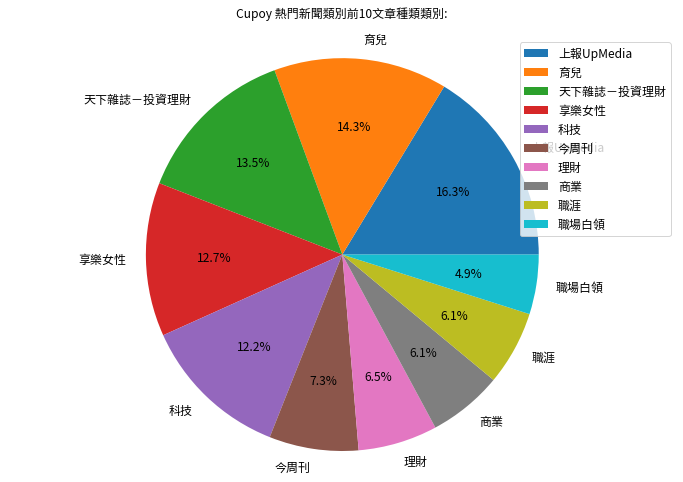

In [62]:
import matplotlib
import matplotlib.pyplot as plt
# import字型管理套件
from matplotlib.font_manager import FontProperties

plt.figure(figsize=(12,8))
labels = categorys['news_category'][:10] # 製作圓餅圖的類別標籤
size = categorys['amounts'][:10]        # 製作圓餅圖的數值來源
separeted = (0, 0, 0.3, 0, 0.3, 0, 0, 0.3, 0, 0.3)         # 依據類別數量，分別設定要突出的區塊
myFont = FontProperties(fname='dictionary\\SourceHanSansTW-Regular.otf', size=12)
title = "Cupoy 熱門新聞類別前10文章種類類別:"

pictures,category_text,percent_text = plt.pie(size,  # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        #explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.65,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},   # 文字大小
        shadow=False)                    # 是否使用陰影

for t in category_text:
    t.set_fontproperties(myFont)   # 把每個分類設成中文字型
for t in percent_text:  
    t.set_fontproperties(myFont)    # 把每個數值設成中文字型

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title(title, fontproperties=myFont, x=0.5, y=1.03)  # 設定標題及其文字大小
plt.legend(loc = "best", prop=myFont)              # # 設定圖例及其位置為最佳
plt.savefig("Day038_040_tmp\\news_category.jpg",   # 儲存圖檔
            bbox_inches='tight',                   # 去除座標軸占用的空間
            pad_inches=0.0)                        # 去除所有白邊
plt.show()
#plt.close()      # 關閉圖表

## Jieba 分詞:

In [63]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import jieba.analyse
import numpy as np
from collections import Counter
import pandas as pd
import codecs

#!pip install wordcloud
#wget https://raw.githubusercontent.com/victorgau/wordcloud/master/dict.txt.big
#wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf

佔用記憶體較小的詞典檔案 https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.small

支援繁體分詞更好的詞典檔案 https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big

In [83]:
# 對於普通分詞，需要將停用詞載入到一數組中，在分詞後，逐一比較關鍵詞是否為停用詞：
#stopwords = [line.strip() for line in codecs.open('stoped_words.txt', 'r', 'utf-8').readlines()] 
#--------------------------------
# 讀入停用詞檔
#--------------------------------
stopwords=[]
with open('dictionary\\stoped_words.txt', 'r', encoding='UTF-8') as file:
#with open('dictionary\\stoped_words.txt', 'r') as file:
     for data in file.readlines():
        data = data.strip()
        stopwords.append(data)
        
# 載入用詞:
jieba.analyse.set_stop_words('dictionary\\stoped_words.txt')

segments = []
for index, row in rows.iterrows():
    content = row[2]
    print(">>> ", index, row[1])
    #print(">>> ", index, row[1], row[2])
    
    #words = jieba.cut(content, cut_all=False)
     
    # 根據TF-IDF算法提取特徵詞:
    # TextRank 關鍵詞抽取，只獲取固定詞性
    words = jieba.analyse.textrank(content, topK=50,withWeight=False,allowPOS=('ns', 'n', 'vn', 'v'))
    #words = jieba.analyse.textrank(content)
    splitedStr = ''
    for word in words:
        if word not in stopwords:
            segments.append({'word':word, 'count':1})
            splitedStr += word + ' '

>>>  0 產品安全設計與廠商誠信之必要 | iThome
>>>  1 教育部閃禁Zoom，讓學校措手不及！ | iThome
>>>  2 超過兩千萬人次瀏覽的TED演講，超夯的「五秒法則」高效行動法 | SmartM 新網路科技
>>>  3 偽單親媽媽：有你沒你，其實沒差 – 媽媽經｜專屬於媽媽的網站
>>>  4 中國維權律師王全璋出獄後　遭「檢疫隔離」期滿仍無法回家
>>>  5 天下財經週報：黑暗快過去了？全球經濟有望緩步解凍☼｜天下雜誌
>>>  7 科甯封后 以求勝鬥志成為「球后殺手」 - 今週刊
>>>  9 2020》4月市場先生推薦書單 - Mr.Market市場先生
>>>  10 Hin Leong Failed to Declare $800 Million Losses
>>>  11 如何每月取得最高 1000 LINE POINTS 點數？ :: 哇哇3C日誌
>>>  12 Cloudflare 1.1.1.1 for Families 家庭版免費 DNS 服務推出，為你阻擋惡意程式及成人內容 :: 哇哇3C日誌
>>>  13 16Gbps GDDR6 讓頻寬激增 14.3％，MSI 推出 GeForce RTX 2080 Ti Gaming Z Trio | T客邦
>>>  14 負責管控疫情遭雙規　中國公安部副部長孫力軍落馬
>>>  15 舊手機、電腦螢幕都能回收再生？這10人做出德國大廠嚇一跳的科技｜天下雜誌
>>>  16 【SPACE X負責】睽違9年後　NASA將重啟載人上太空任務
>>>  17 顏擇雅：炫耀是一種壞身教｜天下雜誌
>>>  18 看見不一樣的臺北！大同街區的影像生活提案
>>>  19 Soft & Share 開源報報 106 - Soft & Share 線上課程資訊分享
>>>  20 延長手機電池壽命　5大正確充電方法｜天下雜誌
>>>  21 獨家專訪張忠謀：我創業的動機，和其他台灣企業主不一樣｜天下雜誌
>>>  22 COVID-19 numbers in this California County may be way underestimated, small antibody study shows | Live Science
>>>  23 讀《莊子》　輕靈跨過生

>>>  175 高盛下調蘋果目標價 預估Q2 iPhone出貨量大減36% - Yahoo奇摩新聞
>>>  176 愛是需要學習的，才20歲就好好的去玩吧！11點說明了20歲vs 30歲的感情轉變 | manfashion這樣變型男
>>>  177 「謝謝妳」，是婚姻裡最美、最有力量的情話
>>>  178 自由時報 3C 科技
>>>  179 臺灣的造神運動從何而來？威權遺緒、政治失落與聖人崇拜 - The News Lens 關鍵評論網
>>>  180 雲端旅行是什麼？ Airbnb推達人體驗，不出國也能玩土耳其咖啡占卜、跟日本僧侶學冥想｜數位時代
>>>  182 掌握這九點新手必知，在動物森友會你也可以追上朋友進度 - 電獺少女
>>>  183 面對選擇，你是害怕風險，還是尋求風險？從心理學中的前景效應談起 - PanSci 泛科學
>>>  184 SaveTweetVid 線上 Twitter 影片下載器，獲取 MP4 或轉 MP3、GIF
>>>  185 可口可樂「臺灣城市瓶」打造在地印象，10個關鍵字設計細節放大看｜數位時代
>>>  186 tiiny.host 超簡單免費靜態網站空間，打包上傳 HTML 網頁檔輕鬆架站
>>>  187 YouTube 可自動偵測影片人物，快速對臉部進行馬賽克模糊處理
>>>  188 ．為什麼說毫米波是通向 5G 時代必經之路？ - 3S Market「全球智慧科技應用」市場資訊網
>>>  189 ‧ 佔 44 億美元的金融銀行安全監控市場 - 3S Market「全球智慧科技應用」市場資訊網
>>>  190 電腦密碼的起源與使用者習慣：母語影響你設密碼的方式？ - The News Lens 關鍵評論網
>>>  191 何妤玟曾想為前夫拚個兒子 公公一句話開導她「生女兒的幸福」 | 親子教養 | 家庭 | 元氣網
>>>  192 HBO GO 在臺灣上線，免註冊！多個熱門影集免費看一個月 - 就是教不落
>>>  193 媽媽教我的零失敗「蘿蔔糕」做法，很詳細，一定要收藏 - 創意妙管家
>>>  194 ．東南亞門禁市場前景樂觀 - 3S Market「全球智慧科技應用」市場資訊網
>>>  195 為什麼超商飲料不該拿「這罐」，因為十年後要拿失智症、癌症來換
>>>  196 雷！「

>>>  346 IDAGIO 古典樂的 Spotify，免費方案提供 200 萬首古典音樂錄音線上收聽
>>>  347 10萬名新聘員工在一個月內到位，Amazon要再增聘7.5萬名員工 | iThome
>>>  348 國民黨「數位諸葛亮」第一天就開槍夜襲，簡勤佑葫蘆裡想賣什麼藥？ - INSIDE
>>>  349 你寄的 email 老是被「已讀不回」？問題可能出在這 3 個小地方 | 經理人
>>>  350 「跟蹤」的英文怎麼說？ | 經理人
>>>  352 英國政府投放遊戲內廣告，鼓勵玩家「待在家裡拯救人命」 - INSIDE
>>>  353 585 人確診！美國羅斯福號航空母艦撤離近 4000 名船員 - INSIDE
>>>  354 調查：35% 增加自煮頻率！疫情消散後，餐飲業下一步怎麼做？ | 經理人
>>>  355 農夫告訴你真正土鳳梨的滋味：你吃的土鳳梨，其實是日治時期進口的夏威夷鳳梨 | BuzzOrange
>>>  356 新iPhone SE亮相將有一波換機潮？果粉曝「3優勢」：太強 - Yahoo奇摩新聞
>>>  357 強勢入駐Kaggle，卻什麼獎牌都沒拿到怎麼辦？Notebooks Grandmaster第一名：我也很苦惱 | 機器之心
>>>  358 中華電稱霸全台4G網速 遠傳坐穩第2 - Yahoo奇摩新聞
>>>  359 KKBOX 7 天免費體驗序號釋出：4/19 前輸入指定序號，即可免費使用 KKBOX 7 天 - Yahoo奇摩新聞
>>>  360 2020年，臺灣300萬戶將面臨孤獨死危機！子女離開身邊的世代，避免一個人死去的5個方法 - 今週刊
>>>  361 帶3萬片口罩但「並非所有官兵在帛琉都全程配戴」　蔡英文要軍方坦誠以對、不可再有疏漏 - 今週刊
>>>  362 新加坡抗疫防線失守 外媒：太早放鬆恐適得其反 | 國際 | 中央社 CNA
>>>  365 獨家照片》香港風暴再起81歲民主之父李柱銘遭逮 昔戰友淚訴：史上最黑暗一天 | 信傳媒
>>>  366 印度封城再升級！斷糧危機下開始有人問「如何料理衛生紙？」｜天下雜誌
>>>  367 【夫妻的世界 花絮】金喜愛、韓素拍攝現場竟如此和睦 | Kdaily 韓粉日常
>>>  368 論文不公開代碼，應該被直接拒稿？ |

### 將詞頻統計存到csv file: keywords.csv:

In [86]:
# 將結果轉述組轉為data frame格式:
df_Sg = pd.DataFrame(segments)

# 詞頻統計:
df_Word = df_Sg.groupby('word')['count'].sum()

# 導出到csv file:
df_Word.to_csv('Day038_040_tmp\\keywords.csv') #,encoding='utf-8')
#print(df_Word.describe())
print(df_Word.nlargest(20))

word
疫情    125
提供    120
生活    111
需要    109
肺炎    101
使用     99
台灣     97
工作     97
希望     95
表示     79
成為     77
全球     76
新冠     75
加入     70
分享     67
文章     60
看到     60
社群     57
科技     57
具有     56
Name: count, dtype: int64


In [84]:
#df_Sg

### 視覺化輸出Words結果的直條圖:

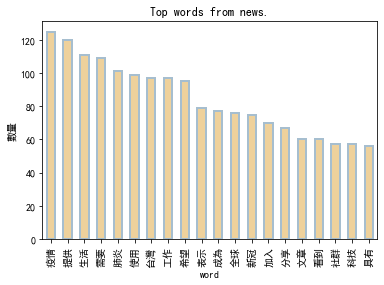

In [87]:
top_words = df_Word.nlargest(20)

# 中文亂碼的處理，rcParams也可以用於設定圖的解析度，大小等資訊
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False

top_words.plot.bar(color='#EED19C', #'#13063F', 
              edgecolor="#A6BECF",
              linewidth=2)
plt.ylabel('數量')

plt.title('Top words from news.')
plt.show()

### 產生 Word Could:

Building prefix dict from D:\Work\Product\Python\eBook\第二屆 Python網路爬蟲實戰研習馬拉松 業界專家陪你升級打怪\Training\Homework\dictionary\dict.txt.big ...
Loading model from cache C:\Users\angus.tu\AppData\Local\Temp\jieba.uda33dd71666a680541ab043565f96fe2.cache
Loading model cost 4.452 seconds.
Prefix dict has been built succesfully.


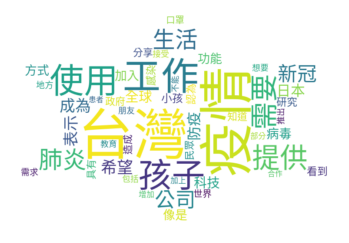

In [88]:
# 將所有文章的內容，放入 segments 列表中:
segments = []
for index, row in rows.iterrows():
    content = row[2]
    #print(">>> ", index, row[1])
    segments.append(content)
    
text = "".join(segments)

    
# 設定stop words:
with open('dictionary\\stoped_words.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')

# 設定使用 big5 斷詞
jieba.set_dictionary('dictionary\\dict.txt.big')

#words = jieba.cut(text, cut_all=False)
# 根據TF-IDF算法提取特徵詞:
# TextRank 關鍵詞抽取，只獲取固定詞性
words = jieba.analyse.textrank(text, topK=50,withWeight=False,allowPOS=('ns', 'n', 'vn', 'v'))


# 拆解句子為字詞
tems =[] #儲存字詞
for t in words:
    if t not in stops:
        tems.append(t)
words = Counter(tems)           
#print(words)


#<>. WordCould:
# 文字雲造型圖片
#mask = np.array(Image.open('dictionary\\heart.png')) # 自設定文字雲形狀
mask = np.array(Image.open('dictionary\\star.png')) # 自設定文字雲形狀
 
# 下載的中文字型:
# 從字型國度下載: https://www.zixingguodu.com/
# https://www.crazy-tutorial.com/80987.html
font = 'dictionary\\SourceHanSansTW-Regular.otf'
    
# 背景顏色預設黑色，改為白色、使用指定圖形、使用指定字體
my_wordcloud = WordCloud(
    background_color='white',
    mask=mask,
    font_path=font
).generate_from_frequencies(words) #.generate(words)

#my_wordcloud =WordCloud(width=400, height=200).fit_words(words)
#my_wordcloud = WordCloud(font_path=font).generate(words)
    
# 視覺化文字雲,輸出圖片:
plt.figure(figsize=(6,6))
#plt.imshow(my_wordcloud)
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    
#存檔
my_wordcloud.to_file('word_cloud.png')